In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import random

2021-09-03 05:10:51.054558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-03 05:10:51.054594: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import json
with open('assets/legend/legend.json') as json_file:
    legend = json.load(json_file)

In [3]:
filepath=['assets/dataset/' + x for x in os.listdir('assets/dataset')]
labels=[x.split('_')[-1].split('.')[0] for x in filepath]
label_names=[legend[x] for x in labels]


In [4]:
filepath=pd.Series(filepath,name='Filepath').astype('str')
labels=pd.Series(label_names,name='Labels').astype('str')

In [5]:
table=pd.concat([filepath,labels],axis=1)
table.head()

,Filepath,Labels
0,assets/dataset/detective_71.jpg,Victreebel
1,assets/dataset/bc_5_41.jpg,Zubat
2,assets/dataset/cave_26.jpg,Raichu
3,assets/dataset/bc_2_131.jpg,Lapras
4,assets/dataset/gym_113.jpg,Chansey


In [6]:
table.iloc[4]

Filepath    assets/dataset/gym_113.jpg
Labels                         Chansey
Name: 4, dtype: object

# Display 15 pictures of the dataset

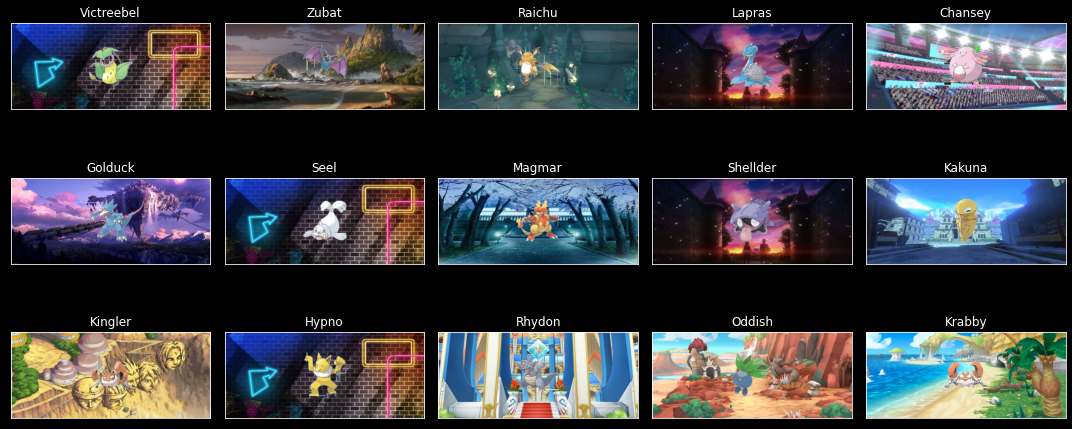

In [8]:
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(table.Filepath[i]))
    ax.set_title(table.Labels[i])
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(table,test_size=0.2)

In [10]:
train_df.head()

,Filepath,Labels
903,assets/dataset/volcano_133.jpg,Eevee
1197,assets/dataset/volcano_21.jpg,Spearow
1379,assets/dataset/volcano_25.jpg,Pikachu
3068,assets/dataset/gym_62.jpg,Poliwrath
2718,assets/dataset/fan_1_12.jpg,Butterfree


In [11]:
def disp(df):
    ig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ch=random.choice(df.index)
        ax.imshow(plt.imread(df.loc[ch].Filepath))
        ax.set_title(df.loc[ch].Labels)
    plt.tight_layout()
    plt.show()


    

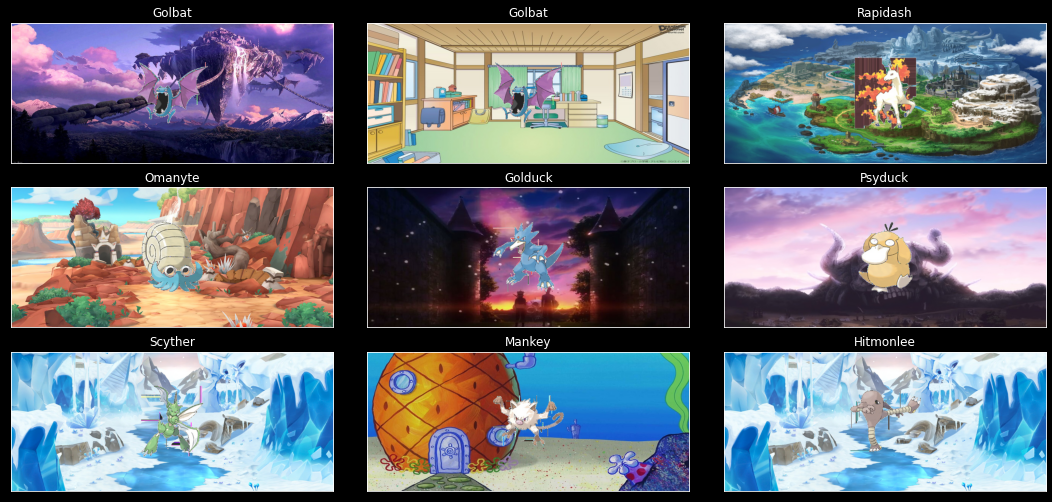

In [12]:
disp(train_df)

# Model 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1.0/255)

train_data=train.flow_from_dataframe(train_df,x_col='Filepath',y_col='Labels',target_size=(1280,554),color_mode='rgb',class_mode='categorical',batch_size=32)
test_data=test.flow_from_dataframe(test_df,x_col='Filepath',y_col='Labels',target_size=(1280,554),color_mode='rgb',class_mode='categorical',batch_size=32)

Found 3382 validated image filenames belonging to 150 classes.
Found 846 validated image filenames belonging to 150 classes.


In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu,input_shape=(1280,554,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(150,activation=tf.keras.activations.softmax)
])
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
history=model.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/3
106/106 [==============================] - 1070s 10s/step - loss: 4.5343 - accuracy: 0.3545 - val_loss: 0.4076 - val_accuracy: 0.9291
Epoch 2/3
106/106 [==============================] - 1099s 10s/step - loss: 0.0605 - accuracy: 0.9899 - val_loss: 0.0554 - val_accuracy: 0.9953
Epoch 3/3
106/106 [==============================] - 1078s 10s/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.0537 - val_accuracy: 0.9846


<AxesSubplot:>

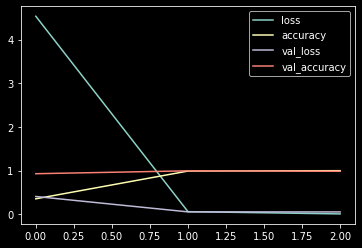

In [18]:
pd.DataFrame(history.history).plot()

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1278, 552, 10)     280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1276, 550, 10)     910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 638, 275, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 636, 273, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 634, 271, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 317, 135, 10)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 427950)           

In [78]:
!pip install pydot
!pip install graphviz

In [79]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model, show_shapes=True)



('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Make predictions

In [27]:
def disp_single(df,ch):
  plt.imshow(plt.imread(df.loc[ch].Filepath))
  plt.title(df.loc[ch].Labels)

## Make a random choice and display pokemon

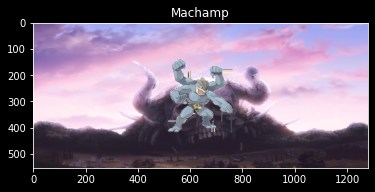

In [81]:
ch=random.choice(test_df.index)
disp_single(test_df,ch)

In [82]:
def load_and_prep_image(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [1280, 554])
  img = img/255
  return img

In [83]:
pred=model.predict(tf.expand_dims(load_and_prep_image(test_df.loc[ch].Filepath), axis=0))

In [84]:
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels[pred.argmax()]

'Machamp'

# Save Model

In [85]:
model.save("tiny_vgg")

2021-09-03 07:06:42.500277: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: tiny_vgg/assets
